# Feature Selection

Based on: https://machinelearningmastery.com/feature-selection-machine-learning-python/
        
Feature selection is a process where you automatically select those features in your data that contribute most
to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

 * Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
 * Improves Accuracy: Less misleading data means modeling accuracy improves.
 * Reduces Training Time: Less data means that algorithms train faster.

You can learn more about feature selection with scikit-learn in the article [Feature selection](http://scikit-learn.org/stable/modules/feature_selection.html).

## 1. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi squared ($chi^2$) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

In [1]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
url = "../datasets/pima_indians_diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print("Fit scores:")
print(fit.scores_)
print(names)
for x,y in zip(names,fit.scores_):
    print("Feature: "+x+" score: ",y)
    
print("Selected features: plas, test, mass and age")
features = fit.transform(X)
# summarize selected features
print("\n Summarise selected features:")
print(features[0:5,:])

Fit scores:
[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
Feature: preg score:  111.51969063588255
Feature: plas score:  1411.887040644141
Feature: pres score:  17.605373215320718
Feature: skin score:  53.10803983632434
Feature: test score:  2175.5652729220137
Feature: mass score:  127.66934333103606
Feature: pedi score:  5.39268154697145
Feature: age score:  181.30368904430023
Selected features: plas, test, mass and age

 Summarise selected features:
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## 2. Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the [RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [2]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression(solver="liblinear")
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("")
for x,y in zip(names, fit.support_):
    print("Feature: "+x+" selected: ",y)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]

Feature: preg selected:  True
Feature: plas selected:  False
Feature: pres selected:  False
Feature: skin selected:  False
Feature: test selected:  False
Feature: mass selected:  True
Feature: pedi selected:  True
Feature: age selected:  False


## Recursive feature elimination with cross-validation

Automatically created module for IPython interactive environment
Optimal number of features : 3


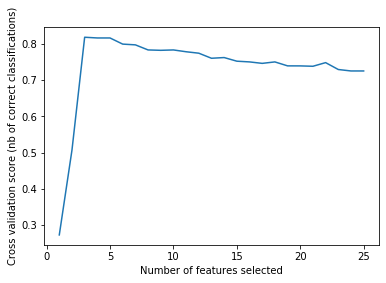

In [4]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
x, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## 3. Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

Learn more about the PCA class in scikit-learn by reviewing the [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) API.

In [16]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


## 4. Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) class in the scikit-learn API.

In [17]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)

[0.111 0.244 0.099 0.076 0.074 0.141 0.117 0.139]


In [18]:
print("")
for x,y in zip(names, model.feature_importances_):
    print("Feature: "+x+" importance: ",y)


Feature: preg importance:  0.11086701467654851
Feature: plas importance:  0.24420937787268895
Feature: pres importance:  0.09878853335307677
Feature: skin importance:  0.07601092311065055
Feature: test importance:  0.07353286432124488
Feature: mass importance:  0.14099561600584368
Feature: pedi importance:  0.11663926224686194
Feature: age importance:  0.13895640841308465
